In [1]:
from training_pipe_GNN3_utils import train_GNN3
from pathlib import Path
import torch
from  visualize import plot_history_GNN3

In [2]:
name = "experience_graph_embedding"
datapath_train = Path('..') / '../DataPipeline/data/preprocessed_graph_train_no_I_Br_P.pt'
datapath_val = Path('..') / '../DataPipeline/data/preprocessed_graph_val_no_I_Br_P.pt'
encoding_size = 7
GCN_size = [16, 32,64,128,256] #must finish by the number of class
edge_size = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_epochs = 101
modif_accelerate = True
results = train_GNN3(name , datapath_train, datapath_val, n_epochs,  encoding_size, GCN_size, edge_size, 
                     feature_position = True, use_dropout = False, lr = 0.0001 , print_bar = True, graph_embedding= True, mlp_hidden= 512, modif_accelerate= modif_accelerate)

KeyboardInterrupt: 

In [ ]:
name = "experience_graph_embedding"
dirpath = Path('.') / 'experiments'/ name / 'training_history.csv'
plot_history_GNN3(dirpath)

In [2]:
name = "experience_features_position"
datapath_train = Path('..') / '../DataPipeline/data/preprocessed_graph_train_no_I_Br_P.pt'
datapath_val = Path('..') / '../DataPipeline/data/preprocessed_graph_val_no_I_Br_P.pt'
encoding_size = 7
GCN_size = [32, 64, 128, 256, 128, 64, 32, 5] #must finish by the number of class
edge_size = 4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_epochs = 201
results = train_GNN3(name , datapath_train, datapath_val, n_epochs,  encoding_size, GCN_size, edge_size, 
                     feature_position = True, use_dropout = False, lr = 0.0001 , print_bar = True)

Dataset encoded with size 7
Dataset encoded with size 7
The 'experience_features_position' directory already exists in the 'experiments' directory.


Training:   0%|          | 0/1476 [00:00<?, ?batch/s]

KeyboardInterrupt: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


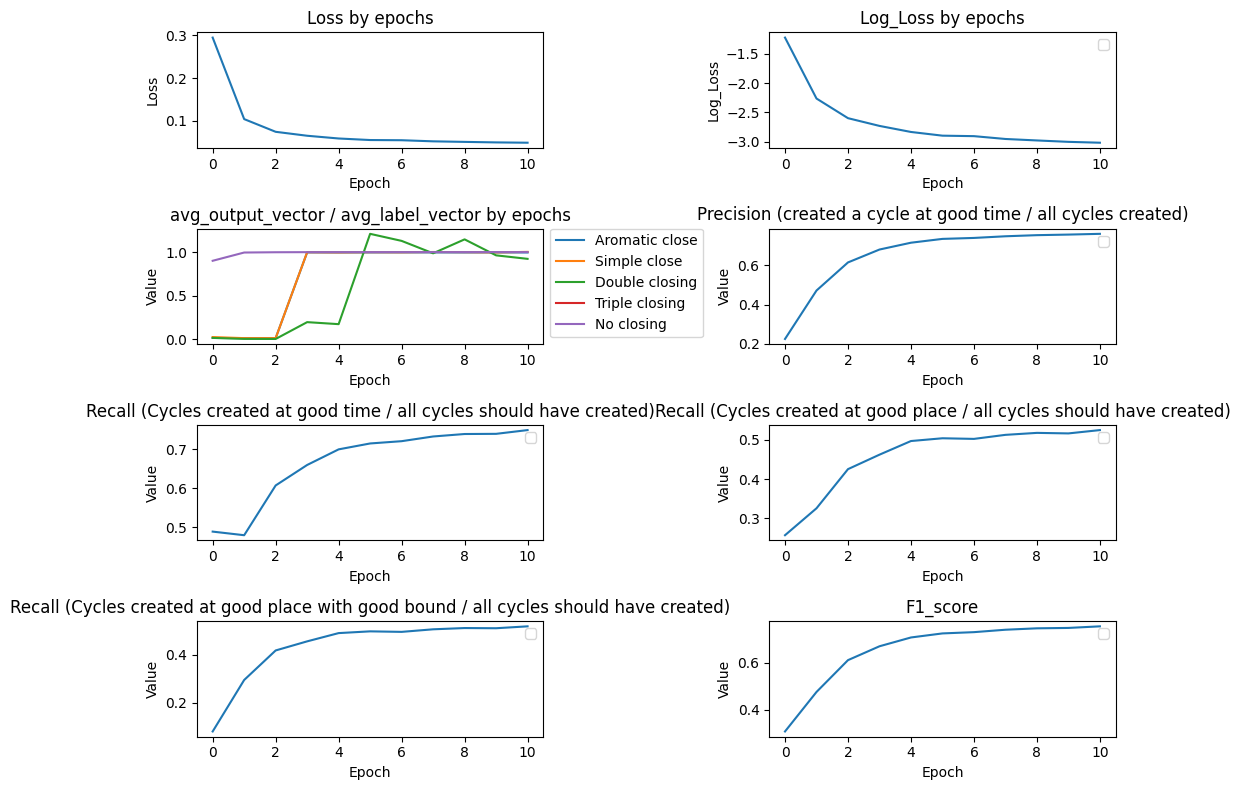

In [ ]:
name = "experience_1"
dirpath = Path('.') / 'experiments'/ name / 'training_history.csv'
plot_history_GNN3(dirpath)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


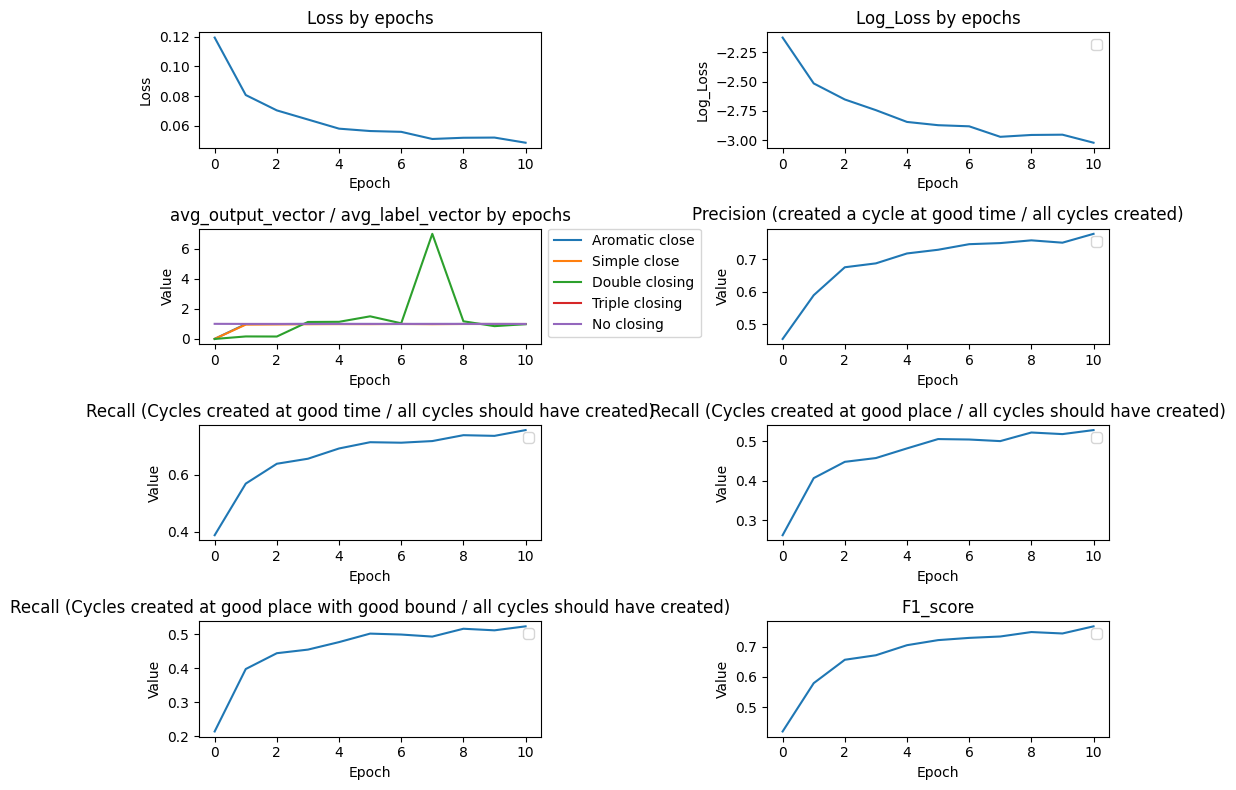

In [ ]:
name = "experience_1"
dirpath = Path('.') / 'experiments'/ name / 'eval_history.csv'
plot_history_GNN3(dirpath)